In [1]:
import sys
sys.path.append("../scripts")

sys.path.append("../")
from fetch_data import DataLoader
from modeling_pipeline import (
    run_train_pipeline, 
    get_pipeline,
    )
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import cross_val_score

import mlflow

In [2]:
loader = DataLoader()

In [3]:
DATASET_PATH = "../data/Debernardi et al 2020 data.csv"
df = loader.read_csv(path=DATASET_PATH)#, version="8dd6295730a6359bb811c45a3e2bac69015d827e", repo="./")

Pandas: CSV read from: ../data/Debernardi et al 2020 data.csv


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            590 non-null    int64  
 1   sex            590 non-null    object 
 2   diagnosis      590 non-null    int64  
 3   plasma_CA19_9  590 non-null    float64
 4   creatinine     590 non-null    float64
 5   LYVE1          590 non-null    float64
 6   REG1B          590 non-null    float64
 7   TFF1           590 non-null    float64
 8   REG1A          590 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 41.6+ KB


In [5]:
x = df.drop(columns=['diagnosis'])
y = df['diagnosis'].values

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            590 non-null    int64  
 1   sex            590 non-null    object 
 2   plasma_CA19_9  590 non-null    float64
 3   creatinine     590 non-null    float64
 4   LYVE1          590 non-null    float64
 5   REG1B          590 non-null    float64
 6   TFF1           590 non-null    float64
 7   REG1A          590 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 37.0+ KB


In [7]:
y.shape

(590,)

{'acc': 0.72, 'f1': 0.72, 'r2': 0.46, 'mae': 0.3}
Run params saved
Run metrics saved
saving dict
Run - RFC is logged to Experiment - scaled


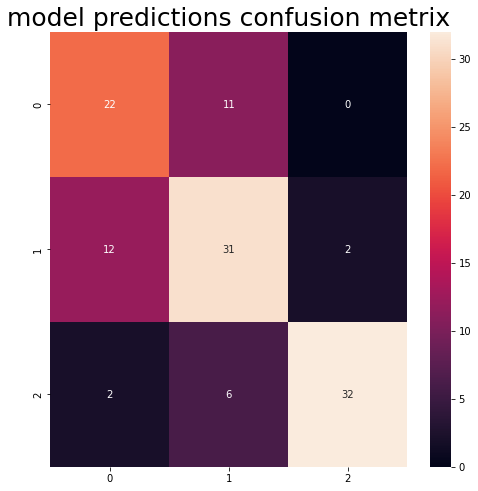

In [15]:
model = RandomForestClassifier(n_jobs=16,
                               max_depth=10,
                               n_estimators=400,
                               random_state=500
                               )
# KNeighborsClassifier
# GaussianNB
# DecisionTreeClassifier
# SVC
# model = SVC(break_ties=True)
run_train_pipeline(model, x, y,
                   experiment_name='scaled',
                   run_name='RFC'
                   )

mlflow.end_run()


In [9]:

y_ded = y - 1
# y

{'acc': 0.7, 'f1': 0.7, 'r2': 0.44, 'mae': 0.31}
Run params saved
Run metrics saved
saving dict
Run - XGBRF-scaled is logged to Experiment - XGBRFClassifier


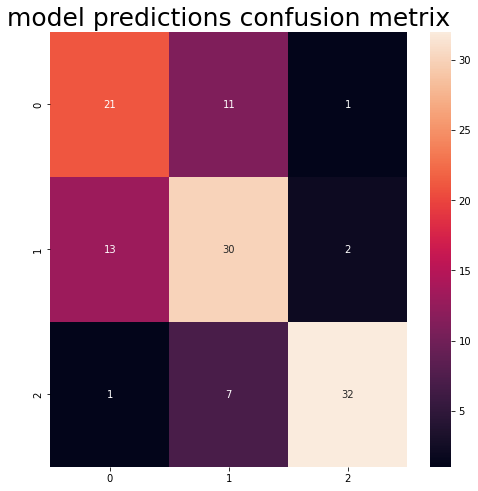

In [10]:
model = XGBRFClassifier(n_jobs=16, 

                      max_depth=5,
                      n_estimators=100,
                      random_state=500
                      )
run_train_pipeline(model, x, y_ded,
                   experiment_name='XGBRFClassifier',
                   run_name='XGBRF-scaled'
                   )

mlflow.end_run()
